# Course 2 Assignment 4

## Potential Moderator

For this assignment we are to perform either an ANOVA, Chi-square or Pearson correlation and see if the result is affected by the presence of a moderator variable.

i.e. does one variable change the relationship we are studying

Since my data is all quantitative, I will use the Pearson correlation again.

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Loading and preparing the data

In [2]:
# show all columns
pd.set_option('display.max_columns', None)
# loading the data from the local file
df = pd.read_csv('data/covid_data.csv')

In [3]:
# prepare data
df.date = pd.to_datetime(df.date)
dfx = df.dropna(subset=['continent'])  # gets rid of summaries for 'world' and 'africa' etc, as I only want data for countries
# the columns I need for this task
cols = ['location', 'date', 'new_cases_per_million','new_deaths_per_million', 'people_fully_vaccinated', 'aged_70_older', 'human_development_index', 'population']
dfx = dfx[cols].dropna()  # getting rid of rows with empty data
# getting rid of rows where new cases and  deaths are below zero (due to error correction I guess?)
dfx = dfx[dfx.new_deaths_per_million >= 0]
dfx = dfx[dfx.new_cases_per_million >= 0]
# limiting it to 2021 which is when vaccinations really got started
dfx = dfx[dfx['date'].dt.year == 2021]
# so as to compare like with like, I'm keeping only countries with human development indices over 0.9
dfx = dfx[dfx.human_development_index > 0.9]
# calculating percentage of population fully vaccinated
dfx['percentage_fully_vaccinated'] = (dfx.people_fully_vaccinated/dfx.population) * 100
dfx.tail()

,location,date,new_cases_per_million,new_deaths_per_million,people_fully_vaccinated,aged_70_older,human_development_index,population,percentage_fully_vaccinated
81005,United States,2021-04-25,96.872,0.843,94772329.0,9.732,0.926,331002647.0,28.631895
81006,United States,2021-04-26,144.080,1.432,95888088.0,9.732,0.926,331002647.0,28.968979
81007,United States,2021-04-27,153.642,1.937,96747454.0,9.732,0.926,331002647.0,29.228604
81008,United States,2021-04-28,166.539,2.897,98044421.0,9.732,0.926,331002647.0,29.620434
81009,United States,2021-04-29,175.826,2.580,99668945.0,9.732,0.926,331002647.0,30.111223


## Pearson Tests

Since age is known to be a major risk factor in covid-19 deaths, I will see if the percentage of the population that is over 70 is a moderating variable.

In [4]:
dfx['aged_ranked'] = pd.cut(dfx.aged_70_older, 2, labels=['younger', 'older'])
dfx[dfx.aged_ranked == 'older'].aged_70_older.describe()

count    750.000000
mean      13.934737
std        1.456590
min       12.849000
25%       12.930000
50%       13.264000
75%       13.799000
max       18.493000
Name: aged_70_older, dtype: float64

In [5]:
dfx[dfx.aged_ranked == 'younger'].aged_70_older.describe()

count    1017.000000
mean       10.301941
std         1.725147
min         7.049000
25%         9.207000
50%        10.797000
75%        12.325000
max        12.644000
Name: aged_70_older, dtype: float64

So the two groups I will compare are the 'older' countries, who have between 12.9 and 18.5% of their population aged over 70, and the 'younger' countries, who have between 7.0 and 12.7% of their population aged over 70.

### original pearson tests

In [6]:
print('association between new cases per million and percentage fully vaccinated')
r, p = stats.pearsonr(dfx.new_cases_per_million, dfx.percentage_fully_vaccinated)
print(f'Pearson’s correlation coefficient (r): {r}')
print(f'p-value: {p}')
if p > 0.05:
    print('This result is not significant.')
else:
    print('This result is significant')

association between new cases per million and percentage fully vaccinated
Pearson’s correlation coefficient (r): -0.0053807474276033876
p-value: 0.8211819306735537
This result is not significant.


In [7]:
print('association between new deaths per million and percentage fully vaccinated')
r, p = stats.pearsonr(dfx.new_deaths_per_million, dfx.percentage_fully_vaccinated)
print(f'Pearson’s correlation coefficient (r): {r}')
print(f'p-value: {p}')
if p > 0.05:
    print('This result is not significant.')
else:
    print('This result is significant')

association between new deaths per million and percentage fully vaccinated
Pearson’s correlation coefficient (r): -0.13757480900025199
p-value: 6.375779754498614e-09
This result is significant


## new pearson tests

In [8]:
df_old = dfx[dfx.aged_ranked == 'older']
df_young = dfx[dfx.aged_ranked == 'younger']
names = ['older', 'younger']
dfs = [df_old, df_young]

for df, name in zip(dfs, names):
    print(f'\nPearson correlation for {name} countries')
    print('\nassociation between new cases per million and percentage fully vaccinated')
    r, p = stats.pearsonr(df.new_cases_per_million, df.percentage_fully_vaccinated)
    print(f'Pearson’s correlation coefficient (r): {r}')
    print(f'p-value: {p}')
    if p > 0.05:
        print('This result is not significant.')
    else:
        print('This result is significant')
        
    print('\nassociation between new deaths per million and percentage fully vaccinated')
    r, p = stats.pearsonr(df.new_deaths_per_million, df.percentage_fully_vaccinated)
    print(f'Pearson’s correlation coefficient (r): {r}')
    print(f'p-value: {p}')
    if p > 0.05:
        print('This result is not significant.')
    else:
        print('This result is significant') 


Pearson correlation for older countries

association between new cases per million and percentage fully vaccinated
Pearson’s correlation coefficient (r): 0.16159437854482545
p-value: 8.694689122866901e-06
This result is significant

association between new deaths per million and percentage fully vaccinated
Pearson’s correlation coefficient (r): -0.19608532843735885
p-value: 6.173514719821813e-08
This result is significant

Pearson correlation for younger countries

association between new cases per million and percentage fully vaccinated
Pearson’s correlation coefficient (r): 0.03453658661964208
p-value: 0.2711750247721304
This result is not significant.

association between new deaths per million and percentage fully vaccinated
Pearson’s correlation coefficient (r): -0.10617040829281121
p-value: 0.0006957563617938796
This result is significant


## Plots

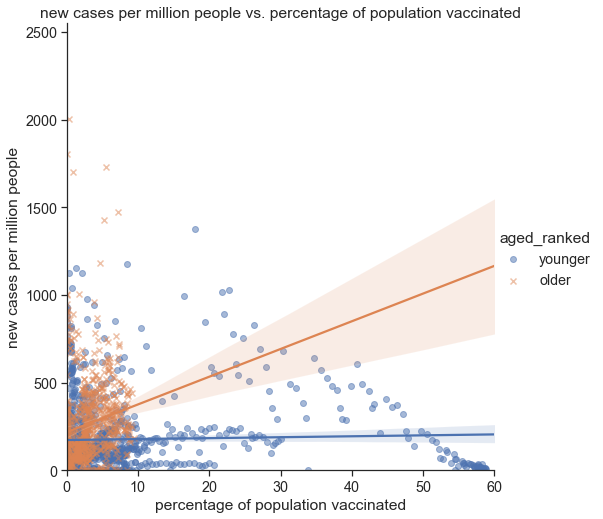

In [9]:
sns.set(font_scale=1.3)
sns.set_style('ticks')
g = sns.lmplot(x="percentage_fully_vaccinated", y="new_cases_per_million", hue="aged_ranked", data=dfx,
               markers=["o", "x"], height=7, truncate=False, scatter_kws={'alpha':0.5})
_ = g.set(ylim=(0,2550), xlim=(0,60), ylabel='new cases per million people', xlabel='percentage of population vaccinated', 
      title='new cases per million people vs. percentage of population vaccinated')

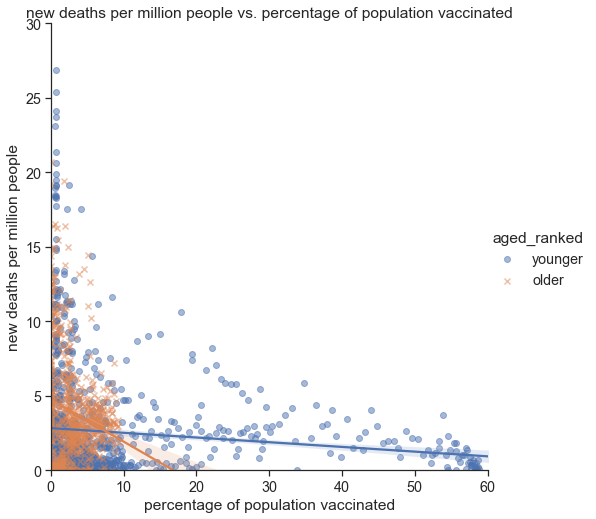

In [10]:
sns.set(font_scale=1.3)
sns.set_style('ticks')
g = sns.lmplot(x="percentage_fully_vaccinated", y="new_deaths_per_million", hue="aged_ranked", data=dfx,
               markers=["o", "x"], height=7, truncate=False, scatter_kws={'alpha':0.5})
_ = g.set(ylim=(0,30), xlim=(0,60), ylabel='new deaths per million people', xlabel='percentage of population vaccinated', 
      title='new deaths per million people vs. percentage of population vaccinated')

## Summary

While the original Pearson test showed no corelation between new cases per million people and the percentage of population vaccinated, this is not true in the 'older countries' subset of my sample (Countries with a Human Development Index greater than 0.9, in 2021).

For those countries with more than 12.9% of their population aged 70 or older, there is a weak positive correlation between the number of new cases per million people and the percentage of population vaccinated (r = 0.162, p < 0.001). This suggests that the more people vaccinated, the more people infected with covid-19! This seems highly unlikely, and I assume there is something else going on. If you look at the graphs, you can see that the data for the older countries is concentrated in the 0 - 10 % vaccinated region, suggesting not much vaccination has actually occured in these countries, and so perhaps we don't currently have enough data to be drawing proper conclusions, I would strongly suggest in this case that correlation does not equal causation!

With that in mind, although the Pearson correlation test showed a stronger correlation in the older countries between the number of new deaths per million people and the percentage of population vaccinated (r = -0.196, p < 0.001) than in the younger countries (r = -0.106, p < 0.001), or overall (r = -0.138, p < 0.001), the issues stated above suggest we should interpret that with caution.